In [5]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
from datetime import date
from wordcloud import WordCloud

In [6]:
speeches = pd.read_pickle("speeches_full.pkl")

print(speeches)

           Date                                           Speeches
0    2018-03-19  [THE PRESIDENT: Thank you to our First Lady, M...
1    2018-02-23  [THE PRESIDENT: Thank you very much. Thank you...
2    2018-02-15  [THE PRESIDENT: My fellow Americans, today I s...
3    2018-02-01  [THE PRESIDENT: Thank you, Paul and Mitch, for...
4    2018-01-30  [Mr. Speaker, Mr. Vice President, Members of C...
5    2018-01-26  [PRESIDENT TRUMP: Thank you, Klaus, very much....
6    2017-12-18  [THE PRESIDENT: Thank you very much. Thank you...
7    2017-09-19  [PRESIDENT TRUMP: Mr. Secretary General, Mr. P...
8    2017-07-24  [TRUMP: Thank you, everybody. Thank you very m...
9    2017-06-29  [THE PRESIDENT: Thank you, everybody. Thank yo...
10   2017-02-28  [Mr. Speaker, Mr. Vice President, Members of C...
11   2017-01-20  [Chief Justice Roberts, President Carter, Pres...
12   2016-05-15  [Hello Rutgers!  (Applause.)  R-U rah-rah!  (A...
13   2016-03-22  [Thank you.  (Applause.)  Muchas gracias.  Th

In [10]:
#This code is designed to count the words in speeches used over a presidential term.

def strip_out_verbs(text):
    #tokenize the text and destem
    speech_tokens = nltk.word_tokenize(text)

    #these tokens include to punctuation - remove these
    pattern = re.compile(r'[^\W]') 
    cleaned_speech_tokens = [item.lower() for item in speech_tokens if re.match(pattern,item)]
    speech_tokens_pos_tag = nltk.pos_tag(cleaned_speech_tokens)
    #print(speech_tokens_pos_tag)

    speech_tokens_verbs = []
    for item in speech_tokens_pos_tag:
        if item[1] in ['VB']:
            if len(item[0])>=5:
                if item not in ['thank','applause','laughter']:
                    speech_tokens_verbs.append(item[0])

    #turn plurals into singular
    #stemmer = PorterStemmer()
    #stemmed_speech_tokens = [stemmer.stem(str(item)) for item in speech_tokens_verbs]
    #print(stemmed_speech_tokens)

    #Now let's remove stop words
    refined_speech_tokens = [item for item in speech_tokens_verbs if not item in stopwords.words('english')]
    #print(refined_speech_tokens)
    #Now let's remove swadesh words
    #refined_speech_tokens = [item for item in refined_speech_tokens if not item in swadesh.words('en')]
    
    #print(refined_speech_tokens.pos_tag())
    #word_counts = Counter(refined_speech_tokens)
    #print(word_counts)
    
    return refined_speech_tokens


In [11]:
# January 20, 2009: Inaugural Address
# January 12, 2016: 2016 State of the Union Address


first_speech_df = speeches.loc[speeches['Date'] == date(2009,1,20)]
final_speech_df = speeches.loc[speeches['Date'] == date(2016,1,12)]
filibuster_speech_df = speeches.loc[speeches['Date'] >= date(2009,1,20) ]
filibuster_speech_df = filibuster_speech_df.loc[filibuster_speech_df['Date'] <= date(2016,1,12) ]

first_speech = ""
for row in first_speech_df['Speeches']:
    first_speech = first_speech + str(row)

final_speech = ""
for row in final_speech_df['Speeches']:
    final_speech = final_speech + str(row)

filibuster_speech = ""
for row in filibuster_speech_df['Speeches']:
    filibuster_speech = filibuster_speech + str(row)

first_speech_verbs = strip_out_verbs(first_speech)
final_speech_verbs = strip_out_verbs(final_speech)
filibuster_speech_verbs = strip_out_verbs(filibuster_speech)

In [12]:
#This code is designed to create word clouds
def make_word_cloud(text):
    text_word_counts = ""
    for item in text:
        text_word_counts = text_word_counts + " " + str(item)
    wordcloud = WordCloud(relative_scaling = 1.0).generate(text_word_counts)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


First Speech


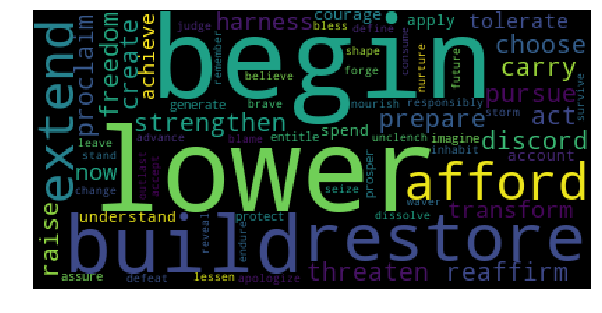

All Speeches


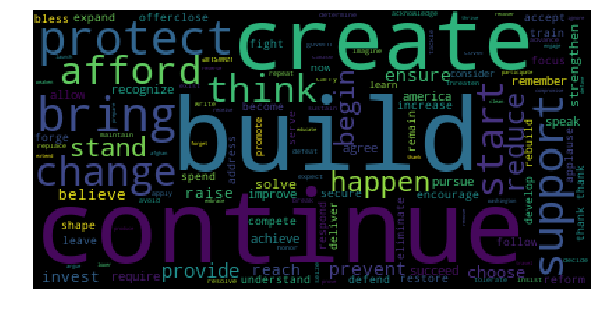

Final Speech


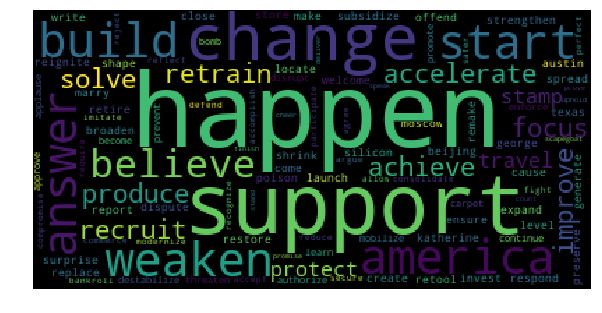

In [13]:
print("First Speech")
make_word_cloud(first_speech_verbs)
print("All Speeches")
make_word_cloud(filibuster_speech_verbs)
print("Final Speech")
make_word_cloud(final_speech_verbs)

In [14]:
# January 20, 2009: Inaugural Address
# January 12, 2016: 2016 State of the Union Address
first_speech_df = speeches.loc[speeches['Date'] == date(2017,1,20)]
all_speech_df = speeches.loc[speeches['Date'] >= date(2017,1,20)]

first_speech = ""
for row in first_speech_df['Speeches']:
    first_speech = first_speech + str(row)

filibuster_speech = ""
for row in all_speech_df['Speeches']:
    filibuster_speech = filibuster_speech + str(row)

first_speech_verbs = strip_out_verbs(first_speech)
filibuster_speech_verbs = strip_out_verbs(filibuster_speech)

First Speech


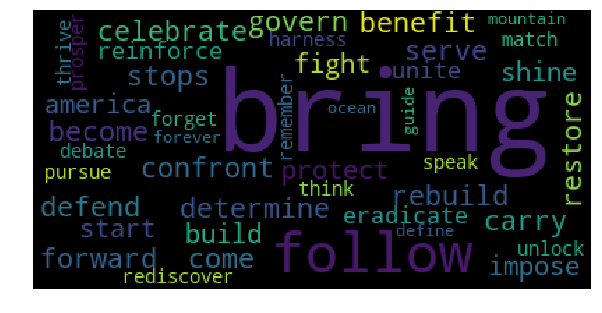

All Speeches


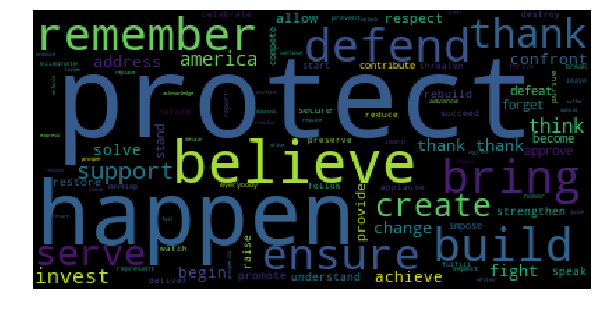

In [15]:
print("First Speech")
make_word_cloud(first_speech_verbs)
print("All Speeches")
make_word_cloud(filibuster_speech_verbs)

In [20]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()


alice_coloring = np.array(Image.open("trump-front-face-transparent.png"))

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(str(filibuster_speech_verbs))

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

ModuleNotFoundError: No module named 'keras'